In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits() # 加载数据

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Digit: 0')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Digit: 1')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Digit: 2')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Digit: 3')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Digit: 4')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Digit: 5')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Digit: 6')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Digit: 7')

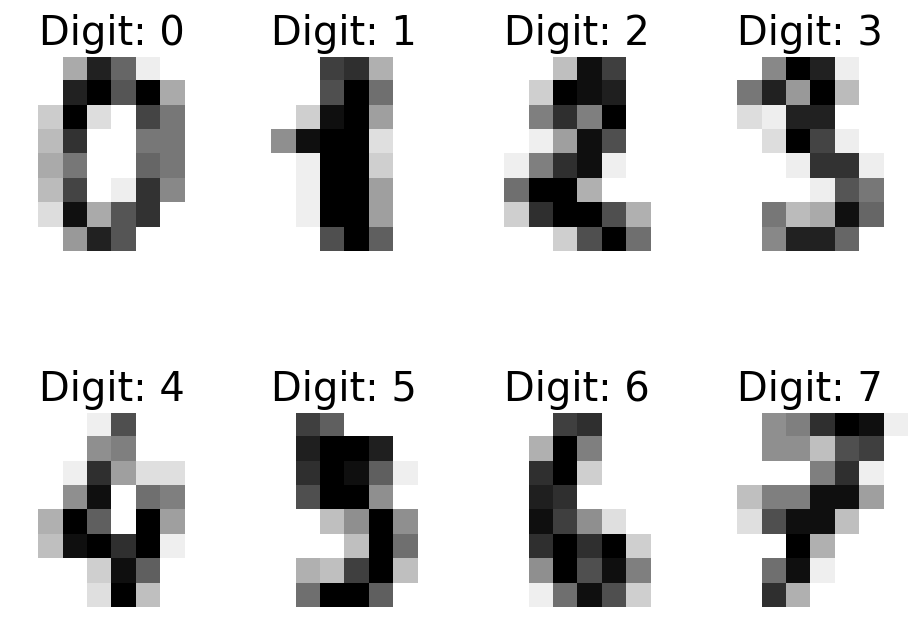

In [3]:
# 把数据所代表的图片显示出来
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(8, 6))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: %i' % label, fontsize=20);

In [4]:
print("shape of raw image data: {0}".format(digits.images.shape))
print("shape of data: {0}".format(digits.data.shape))

shape of raw image data: (1797, 8, 8)
shape of data: (1797, 64)


In [5]:
# 把数据分成训练数据集和测试数据集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data, digits.target, test_size=0.20, random_state=2);

In [6]:
# 使用支持向量机来训练模型
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100., probability=True)
clf.fit(Xtrain, Ytrain);

In [7]:
# 评估模型的准确度
from sklearn.metrics import accuracy_score
Ypred = clf.predict(Xtest);
accuracy_score(Ytest, Ypred)

0.9777777777777777

In [8]:
clf.score(Xtest, Ytest)

0.9777777777777777

Text(0.05, 0.05, '4')

Text(0.8, 0.05, '4')

[]

[]

Text(0.05, 0.05, '0')

Text(0.8, 0.05, '0')

[]

[]

Text(0.05, 0.05, '9')

Text(0.8, 0.05, '9')

[]

[]

Text(0.05, 0.05, '1')

Text(0.8, 0.05, '1')

[]

[]

Text(0.05, 0.05, '8')

Text(0.8, 0.05, '4')

[]

[]

Text(0.05, 0.05, '7')

Text(0.8, 0.05, '7')

[]

[]

Text(0.05, 0.05, '1')

Text(0.8, 0.05, '1')

[]

[]

Text(0.05, 0.05, '5')

Text(0.8, 0.05, '5')

[]

[]

Text(0.05, 0.05, '1')

Text(0.8, 0.05, '1')

[]

[]

Text(0.05, 0.05, '6')

Text(0.8, 0.05, '6')

[]

[]

Text(0.05, 0.05, '6')

Text(0.8, 0.05, '6')

[]

[]

Text(0.05, 0.05, '7')

Text(0.8, 0.05, '7')

[]

[]

Text(0.05, 0.05, '6')

Text(0.8, 0.05, '6')

[]

[]

Text(0.05, 0.05, '1')

Text(0.8, 0.05, '1')

[]

[]

Text(0.05, 0.05, '5')

Text(0.8, 0.05, '5')

[]

[]

Text(0.05, 0.05, '5')

Text(0.8, 0.05, '5')

[]

[]

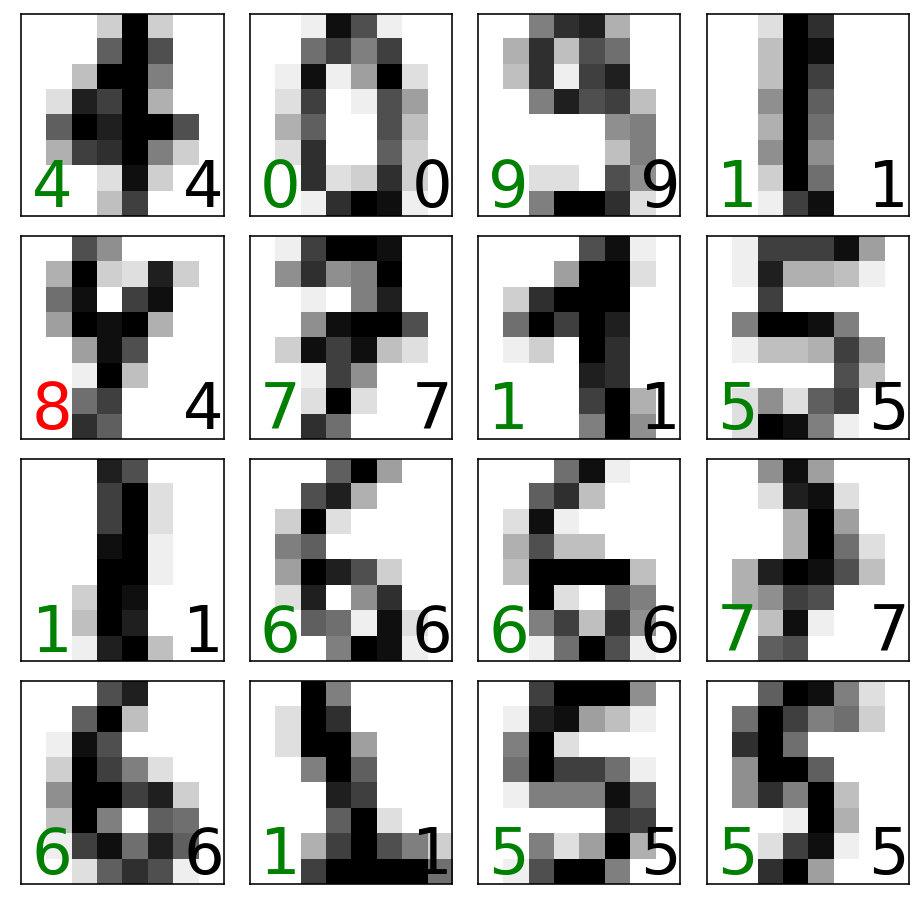

In [9]:
# 查看预测的情况
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.text(0.05, 0.05, str(Ypred[i]), fontsize=32,
            transform=ax.transAxes,
            color='green' if Ypred[i] == Ytest[i] else 'red')
    ax.text(0.8, 0.05, str(Ytest[i]), fontsize=32,
            transform=ax.transAxes,
            color='black')
    ax.set_xticks([])
    ax.set_yticks([])

In [10]:
# Xtest[4] 的各种可能性
clf.predict_proba(Xtest[4].reshape(1, -1))

array([[0.00449066, 0.02430411, 0.0164765 , 0.01079986, 0.03271168,
        0.031624  , 0.0049929 , 0.16241138, 0.5626993 , 0.14948961]])

In [13]:
# 保存模型参数
import joblib
joblib.dump(clf, 'digits_svm.pkl');

In [14]:
# 导入模型参数，直接进行预测
clf = joblib.load('digits_svm.pkl')
Ypred = clf.predict(Xtest);
clf.score(Xtest, Ytest)

0.9777777777777777